In [194]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [140]:
df = pd.read_excel("pone.0212445.s004.xlsx")

In [141]:
SurveyRowData = df.loc[df['Estimate'] == 'Survey']

In [159]:
SurveyRowData;

In [143]:
TotNoPLHIV = df['NoPLHIV'].sum()

In [144]:
print("Total number of people living with HIV according to the Survey estimate =", TotNoPLHIV) 

Total number of people living with HIV according to the Survey estimate = 12887080


In [145]:
XhariepData = df.loc[df['District'] == 'Xhariep']['NoPLHIV'].mean()

In [146]:
print("Average NoPLHIV of the two estimates used for “Xhariep” =", XhariepData)

Average NoPLHIV of the two estimates used for “Xhariep” = 12247.5


In [147]:
df["Number of people not living with HIV"] = df["NoPLHIV"]*(100 - df["Prevalence_%"])/df["Prevalence_%"]

In [215]:
df

,District,Code,Estimate,Prevalence,Prevalence LCL,Prevalence UCL,NoPLHIV,NoPLHIV LCL,NoPLHIV UCL,NumberofpeoplenotlivingwithHIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,6.507762e+05
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,6.515169e+05
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3.659845e+06
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3.628178e+06
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,4.072906e+05
...,...,...,...,...,...,...,...,...,...,...
99,Mangaung,MAN,Fay-Heriott,9.147425,6.725917,12.325536,101520,74646,136792,1.008301e+06
100,Nelson Mandela Bay Metro,NMA,Survey,8.300000,3.400000,13.200000,97459,39923,154995,1.076746e+06
101,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.054060,6.128703,13.179704,106313,71964,154757,1.067889e+06
102,City of Tshwane,TSH,Survey,11.700000,7.388000,16.012000,361450,228239,494661,2.727866e+06


In [149]:
CityData = df[df['District'].str.contains('City|Metro')]

In [150]:
CityData;

In [151]:
CityNoPLHIV = CityData['NoPLHIV'].sum()

In [152]:
print("Total number of people living with HIV in all the cities =", CityNoPLHIV) 

Total number of people living with HIV in all the cities = 2572733


In [154]:
df.columns = df.columns.str.replace(r'\W', '', regex=True)

In [156]:
df.columns = df.columns.str.replace('_',' ')

In [177]:
print(df.columns)

Index(['District', 'Code', 'Estimate', 'Prevalence ', 'Prevalence LCL',
       'Prevalence UCL', 'NoPLHIV', 'NoPLHIV LCL', 'NoPLHIV UCL',
       'NumberofpeoplenotlivingwithHIV'],
      dtype='object')


In [161]:
FHRowData = df.loc[df['Estimate'] == 'Fay-Heriott']

In [208]:
mask = FHRowData['District'].str.endswith('i')

In [209]:
Data = FHRowData[mask]

In [210]:
Data

,District,Code,Estimate,Prevalence,Prevalence LCL,Prevalence UCL,NoPLHIV,NoPLHIV LCL,NoPLHIV UCL,NumberofpeoplenotlivingwithHIV
11,Chris Hani,DC13,Fay-Heriott,14.080983,11.181220,17.583893,113090,89801,141224,6.900500e+05
13,Joe Gqabi,DC14,Fay-Heriott,11.507804,9.291766,14.169794,40618,32796,50013,3.123425e+05
25,Fezile Dabi,DC20,Fay-Heriott,10.030754,7.811309,12.793304,50767,39534,64748,4.553465e+05
33,uMzinyathi,DC24,Fay-Heriott,18.097578,16.845087,19.421445,93061,86620,99868,4.211570e+05
51,Ehlanzeni,DC32,Fay-Heriott,15.820960,12.012425,20.554906,271179,205899,352321,1.442870e+06
53,Mopani,DC33,Fay-Heriott,11.294971,7.921185,15.858238,87157,61123,122369,6.844873e+05
65,Dr Ruth Segomotsi Mompati,DC39,Fay-Heriott,11.045235,8.164344,14.779090,52136,38538,69761,4.198866e+05
93,Ekurhuleni,EKU,Fay-Heriott,13.678908,10.647292,17.405572,441990,344033,562405,2.789189e+06
95,eThekwini,ETH,Fay-Heriott,14.537772,11.791222,17.795017,503618,408472,616456,2.960585e+06


C:\Users\Wikus\AppData\Local\Temp\ipykernel_15860\2406448537.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((low,up),(y,y),'ro-',color='blue')


Text(0.5, 1.0, 'Prevalence confidence intervals')

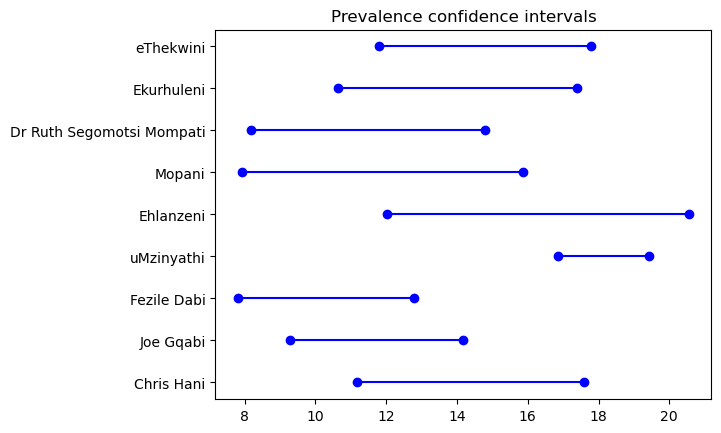

In [214]:
for low,up,y in zip(Data['Prevalence LCL'],Data['Prevalence UCL'],range(len(Data))):
    plt.plot((low,up),(y,y),'ro-',color='blue')
plt.yticks(range(len(Data)),list(Data['District']))
plt.title('Prevalence confidence intervals')